<a href="https://colab.research.google.com/github/Angel353/Concentracion_CADII/blob/main/ValoresNulos/TareasValoresNulosBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statistics as st

# **Lectura de la base y comprobación de valores nulos**

In [ ]:
from google.colab import files
files.upload()

In [52]:
df = pd.read_csv('Base_Socio_Formador_Con_Nulos.csv', encoding="latin")
df

,fecha,precio,año_hecho,año_renovado,metros_cuadrados,pisos,habitaciones,baños,calle,codigo_zip,estado,ciudad
0,24/06/2019,"$260,070",01/01/1982,2016.0,762.0,1.0,4.0,2.0,2400 WALNUT RIDGE ST,75229.0,TX,DALLAS
1,18/07/2019,"$456,280",01/01/1982,2016.0,866.0,2.0,4.0,2.0,10400 BIG THICKET DR,75217.0,TX,DALLAS
2,31/07/2019,"$237,820",01/01/1982,2016.0,814.0,1.0,5.0,3.0,9200 DARTWOOD LN,75225.0,TX,DALLAS
3,14/08/2019,"$231,000",01/01/1980,2016.0,680.0,1.0,4.0,2.0,4800 SIMCOE ST,75228.0,TX,DALLAS
4,31/07/2019,"$1,410,820",01/01/1980,2016.0,1018.0,2.0,4.0,2.0,6926 STEFANI DR,75225.0,TX,DALLAS
...,...,...,...,...,...,...,...,...,...,...,...,...
4354,04/07/2019,NaN,01/01/1928,0.0,305.0,1.0,2.0,1.0,1301 HAMEL ST,75212.0,TX,DALLAS
4355,14/06/2019,"$257,360",01/01/1928,0.0,299.0,1.0,2.0,1.0,3501 WORD ST,75204.0,TX,DALLAS
4356,16/07/2019,"$881,200",01/01/1927,0.0,817.0,2.0,5.0,3.0,1700 RIDGEDORF DR,75217.0,TX,DALLAS
4357,05/08/2019,"$877,080",01/01/1927,0.0,576.0,2.0,4.0,2.0,8024 ROTHINGTON RD,75227.0,TX,DALLAS


In [53]:
# Vemos el tipo de datos de acuerdo a cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             4347 non-null   object 
 1   precio            4328 non-null   object 
 2   año_hecho         4349 non-null   object 
 3   año_renovado      4339 non-null   float64
 4   metros_cuadrados  4333 non-null   float64
 5   pisos             4340 non-null   float64
 6   habitaciones      4348 non-null   float64
 7   baños             4346 non-null   float64
 8   calle             4333 non-null   object 
 9   codigo_zip        4339 non-null   float64
 10  estado            4353 non-null   object 
 11  ciudad            4340 non-null   object 
dtypes: float64(6), object(6)
memory usage: 408.8+ KB


In [54]:
# Eliminamos los símbolos que hacen que la columna de precio sea de tipo objeto
df['precio'] = df['precio'].str.replace('$', '')
df['precio'] = df['precio'].str.replace(',', '')
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

In [55]:
# Comprobamos los valores nulos por columna
df.isnull().sum()

,0
fecha,12
precio,31
año_hecho,10
año_renovado,20
metros_cuadrados,26
pisos,19
habitaciones,11
baños,13
calle,26
codigo_zip,20


In [56]:
# Se hace una copia de la base para aplicar transformaciones
dfCopy = df.copy()

In [57]:
# Sumamos las columnas "Pisos", "Habitaciones" y "Baños"
dfCopy["estructura"] = df["pisos"] + df["habitaciones"] + df["baños"]

In [58]:
# Separamos los datos cuantitativos también
dfNum = dfCopy.select_dtypes(np.number)
dfNum

,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip,estructura
0,260070.0,2016.0,762.0,1.0,4.0,2.0,75229.0,7.0
1,456280.0,2016.0,866.0,2.0,4.0,2.0,75217.0,8.0
2,237820.0,2016.0,814.0,1.0,5.0,3.0,75225.0,9.0
3,231000.0,2016.0,680.0,1.0,4.0,2.0,75228.0,7.0
4,1410820.0,2016.0,1018.0,2.0,4.0,2.0,75225.0,8.0
...,...,...,...,...,...,...,...,...
4354,NaN,0.0,305.0,1.0,2.0,1.0,75212.0,4.0
4355,257360.0,0.0,299.0,1.0,2.0,1.0,75204.0,4.0
4356,881200.0,0.0,817.0,2.0,5.0,3.0,75217.0,10.0
4357,877080.0,0.0,576.0,2.0,4.0,2.0,75227.0,8.0


In [59]:
# Encontramos todas las correlaciones entre las variables
dfCorr = dfNum.corr()
dfCorr
# Se aplica valor absoluto
dfCorrABS = abs(dfCorr)
dfCorrABS

,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip,estructura
precio,1.000000,0.031339,0.423144,0.141091,0.193676,0.294990,0.007372,0.281147
año_renovado,0.031339,1.000000,0.157824,0.242081,0.090686,0.287969,0.011103,0.258652
metros_cuadrados,0.423144,0.157824,1.000000,0.318011,0.589283,0.724072,0.040189,0.736510
pisos,0.141091,0.242081,0.318011,1.000000,0.161997,0.449834,0.023682,0.607700
habitaciones,0.193676,0.090686,0.589283,0.161997,1.000000,0.519157,0.012109,0.792208
baños,0.294990,0.287969,0.724072,0.449834,0.519157,1.000000,0.025219,0.876034
codigo_zip,0.007372,0.011103,0.040189,0.023682,0.012109,0.025219,1.000000,0.025303
estructura,0.281147,0.258652,0.736510,0.607700,0.792208,0.876034,0.025303,1.000000


<Axes: >

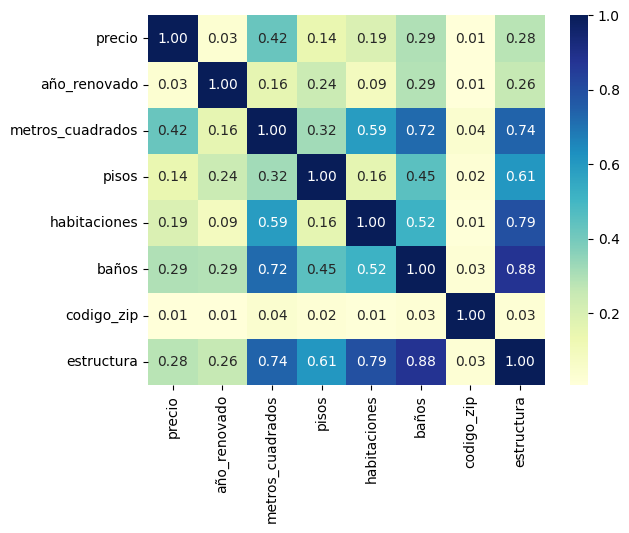

In [60]:
# Graficamos el mapa de calor de los coeficientes de correlación
dfHeatMap = sns.heatmap(dfCorrABS, cmap = 'YlGnBu', annot = True, fmt = ".2f")
dfHeatMap

In [61]:
# Eliminamos la columna de estructura dado que su nivel de correlación con el precio no resulta significativa
dfCopy.drop("estructura", axis = 1, inplace = True)

# **Limpieza de valores nulos**

In [62]:
# Vista del df
dfCopy.head()

,fecha,precio,año_hecho,año_renovado,metros_cuadrados,pisos,habitaciones,baños,calle,codigo_zip,estado,ciudad
0,24/06/2019,260070.0,01/01/1982,2016.0,762.0,1.0,4.0,2.0,2400 WALNUT RIDGE ST,75229.0,TX,DALLAS
1,18/07/2019,456280.0,01/01/1982,2016.0,866.0,2.0,4.0,2.0,10400 BIG THICKET DR,75217.0,TX,DALLAS
2,31/07/2019,237820.0,01/01/1982,2016.0,814.0,1.0,5.0,3.0,9200 DARTWOOD LN,75225.0,TX,DALLAS
3,14/08/2019,231000.0,01/01/1980,2016.0,680.0,1.0,4.0,2.0,4800 SIMCOE ST,75228.0,TX,DALLAS
4,31/07/2019,1410820.0,01/01/1980,2016.0,1018.0,2.0,4.0,2.0,6926 STEFANI DR,75225.0,TX,DALLAS


In [63]:
# Comprobamos los valores nulos por columna
dfCopy.isnull().sum()

,0
fecha,12
precio,31
año_hecho,10
año_renovado,20
metros_cuadrados,26
pisos,19
habitaciones,11
baños,13
calle,26
codigo_zip,20


In [64]:
# Verificamos los valores de las columnas "estado" y "ciudad"
dfCopy["estado"].value_counts()
dfCopy["ciudad"].value_counts()

,count
ciudad,
DALLAS,4340


Como solo tenemos valores de TX (texas) para "estado" y "Dallas" para la columna "ciudad", entonces reemplazaremos los valores nulos con esas cadenas de texto.

In [65]:
dfCopy["estado"] = dfCopy["estado"].fillna("TX")
dfCopy["ciudad"] = dfCopy["ciudad"].fillna("DALLAS")

En el caso del código zip dado que es valor numérico pero no tiene relación con la variable precio, he decidido reemplazarla por un número específico para tenerlas mapeadas ante posibles gráficas, en este caso lo haría con el "0"

In [66]:
dfCopy['codigo_zip'].fillna(0, inplace=True)

Para la columna "calle" también utilizaría el mismo parámetro dado que deben guardar cierta relación al utilizar herramientas de graficación o análisis por la naturaleza de los datos.

In [67]:
dfCopy['calle'].fillna("No disponible", inplace=True)

Las siguientes tres columnas llamadas "baños", "habitaciones" y "pisos", aunque individualmente no parecen tener una alta correlación con el precio, sí la tienen con la columna de metros cuadrados, por lo que los valores nulos serán reemplazados por la mediana para no afectar los análisis posteriores. Además, debemos asegurarnos que sean en formato entero dado la naturaleza de los datos

In [68]:
dfCopy["baños"] = dfCopy["baños"].fillna(int(round(df["baños"].median(), 0)))
dfCopy["habitaciones"] = dfCopy["habitaciones"].fillna(int(round(df["habitaciones"].median(), 0)))
dfCopy["pisos"] = dfCopy["pisos"].fillna(int(round(df["pisos"].median(), 0)))

Pasando a la columna de los metros cuadrados, estos tendrán una limpieza similar a las anteriores ya que esta variable tiene una correlación grande con el precio, por lo que se desea conservar la distribución de la información y se utilizará la mediana, aquí sí se permite el uso del punto decimal.

In [69]:
dfCopy["metros_cuadrados"] = dfCopy["metros_cuadrados"].fillna(round(df["metros_cuadrados"].median(), 1))

Para las colummnas de los años, fechas y el precio, tomaré en cuenta la distribución de las variables cuando la fecha es un valor nulo y así lograr entender mejor los registros.

In [70]:
# Filtrar el DataFrame por valores nulos en la columna "fecha"
df[df['fecha'].isnull()]

,fecha,precio,año_hecho,año_renovado,metros_cuadrados,pisos,habitaciones,baños,calle,codigo_zip,estado,ciudad
943,NaN,230620.0,01/01/1986,2002.0,628.0,2.0,3.0,3.0,1701 STELLA AVE,75203.0,TX,DALLAS
1145,NaN,NaN,01/01/1920,2001.0,558.0,2.0,4.0,1.0,3100 LATTA CIR,75227.0,TX,DALLAS
1558,NaN,476190.0,01/01/1951,NaN,576.0,1.0,4.0,2.0,4704 BALDWIN ST,75210.0,TX,DALLAS
1568,NaN,335970.0,01/01/1906,1985.0,238.0,1.0,1.0,1.0,NaN,NaN,TX,NaN
1569,NaN,NaN,01/01/1956,NaN,262.0,1.0,2.0,1.0,NaN,75209.0,TX,NaN
1570,NaN,NaN,01/01/1956,1984.0,NaN,1.0,NaN,3.0,NaN,75205.0,TX,NaN
1571,NaN,NaN,01/01/1956,1984.0,1045.0,1.0,6.0,3.0,NaN,75229.0,TX,NaN
1647,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,701 FOURAKER ST,75208.0,TX,DALLAS
3040,NaN,322740.0,01/01/1991,0.0,469.0,1.0,3.0,2.0,5119 VICKERY BLVD,75206.0,TX,NaN
3214,NaN,645630.0,NaN,NaN,850.0,NaN,NaN,NaN,2101 BALLYCASTLE DR,75228.0,TX,DALLAS


Como se puede ver, muchas de las fechas de "año_hecho" son bastante antiguas o también tienen nulos, lo mismo aplica para el año renovado, donde el más reciente computado fue de 2002, así tenemos una mejor noción para proceder.

Para el año_renovado, he decidido darle un valor determinado para poder agruparlos, en esta ocasión será 0. (Serían filtrados en posteriores análisis)

En año hecho será utilizado una cadena de texto llamada "No hay registro" ya que no contamos con más parámetros para poder estandarizar la respuesta, y finalmente, la fecha será reemplazada por la moda ya que esta es independiente a las columnas antes mencionadas.


In [71]:
dfCopy['año_renovado'].fillna(0, inplace=True)
dfCopy['año_hecho'].fillna("No hay registro", inplace=True)

# Calcular la moda ignorando los valores nulos para la columna "fecha"

moda = st.mode(x for x in df['fecha'] if x is not None)
moda

# Rellenar los valores nulos con la moda

dfCopy["fecha"].fillna(moda, inplace=True)

Finalmente, para la columna "precio", las filas con valores nulos serán reemplazados por la mediana para no desestabilizar la distribución de los datos ni posteriores análisis. Además, con el uso de otras columnas, los registros podrán filtrarse de acuerdo con otros parámetros.

In [72]:
dfCopy["precio"] = dfCopy["precio"].fillna(round(df["precio"].median(), 1))

In [73]:
# Comprobamos los valores nulos del dataframe tras el proceso de limpieza:
dfLimpio = dfCopy.isnull().sum()
dfLimpio.sum()

0

In [74]:
# Convertir Dataframe a CSV
dfCopy.to_csv("BaseLimpia.csv")

from google.colab import files

files.download("BaseLimpia.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>